<a href="https://colab.research.google.com/github/Hitoshi-Nakanishi/Recommendation/blob/master/003_best_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import logging
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from MatrixFactorization.PMF import PMF

root_dir = Path.cwd() / Path('../data/ml-latest-small')
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('my_logger')

/Users/hitoshinakanishi/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
movies = pd.read_csv(root_dir / 'movies.csv')
ratings = pd.read_csv(root_dir / 'ratings.csv')
movies.movieId = movies.movieId - 1
ratings.userId = ratings.userId - 1
ratings.movieId = ratings.movieId - 1

In [ ]:
display(movies.head(2))
display(ratings.head(2))

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Jumanji (1995),Adventure|Children|Fantasy


,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,2,4.0,964981247


In [ ]:
ratings2 = ratings.query('movieId < 400').iloc[:,:3].values.astype(np.int)
print(ratings2.shape)
dims = {}
dims['N'] = ratings2[:,0].max() + 1
dims['M'] = ratings2[:,1].max() + 1

(11572, 3)


INFO:my_logger:epoch: 0 🤔 start to compute U
INFO:my_logger:epoch: 0 😁 start to compute V
INFO:my_logger:epoch: 1 🤔 start to compute U
INFO:my_logger:epoch: 1 😁 start to compute V
INFO:my_logger:epoch: 2 🤔 start to compute U
INFO:my_logger:epoch: 2 😁 start to compute V
INFO:my_logger:epoch: 3 🤔 start to compute U
INFO:my_logger:epoch: 3 😁 start to compute V
INFO:my_logger:epoch: 4 🤔 start to compute U
INFO:my_logger:epoch: 4 😁 start to compute V
INFO:my_logger:epoch: 5 🤔 start to compute U
INFO:my_logger:epoch: 5 😁 start to compute V
INFO:my_logger:epoch: 6 🤔 start to compute U
INFO:my_logger:epoch: 6 😁 start to compute V
INFO:my_logger:epoch: 7 🤔 start to compute U
INFO:my_logger:epoch: 7 😁 start to compute V
INFO:my_logger:epoch: 8 🤔 start to compute U
INFO:my_logger:epoch: 8 😁 start to compute V


CPU times: user 27.4 s, sys: 1.84 s, total: 29.3 s
Wall time: 16.5 s


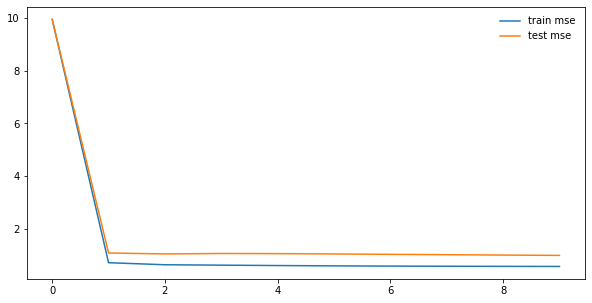

In [ ]:
%%time
train_r, test_r = train_test_split(ratings2, test_size=0.2)
params = {'dims': dims, 'dim_D': 2, 'lambda_': 1, 'sigma2': 1, 'epoch_num': 10, 'logger': logger}
pmf = PMF(**params).fit(train_r)
train_mse = pmf.compute_hitstorical_errors(train_r)
test_mse = pmf.compute_hitstorical_errors(test_r)
result = pd.concat([train_mse.to_frame('train mse'),
                    test_mse.to_frame('test mse')], axis=1)
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
result.plot(ax=ax)
plt.legend(frameon=False)

INFO:my_logger:epoch: 0 🤔 start to compute U
INFO:my_logger:epoch: 0 😁 start to compute V
INFO:my_logger:epoch: 1 🤔 start to compute U
INFO:my_logger:epoch: 1 😁 start to compute V
INFO:my_logger:epoch: 2 🤔 start to compute U
INFO:my_logger:epoch: 2 😁 start to compute V
INFO:my_logger:epoch: 3 🤔 start to compute U
INFO:my_logger:epoch: 3 😁 start to compute V
INFO:my_logger:epoch: 4 🤔 start to compute U
INFO:my_logger:epoch: 4 😁 start to compute V
INFO:my_logger:epoch: 5 🤔 start to compute U
INFO:my_logger:epoch: 5 😁 start to compute V
INFO:my_logger:epoch: 6 🤔 start to compute U
INFO:my_logger:epoch: 6 😁 start to compute V
INFO:my_logger:epoch: 7 🤔 start to compute U
INFO:my_logger:epoch: 7 😁 start to compute V
INFO:my_logger:epoch: 8 🤔 start to compute U
INFO:my_logger:epoch: 8 😁 start to compute V
INFO:my_logger:epoch: 9 🤔 start to compute U
INFO:my_logger:epoch: 9 😁 start to compute V
INFO:my_logger:epoch: 10 🤔 start to compute U
INFO:my_logger:epoch: 10 😁 start to compute V
INFO:my_

CPU times: user 1min 58s, sys: 13.5 s, total: 2min 12s
Wall time: 38.4 s


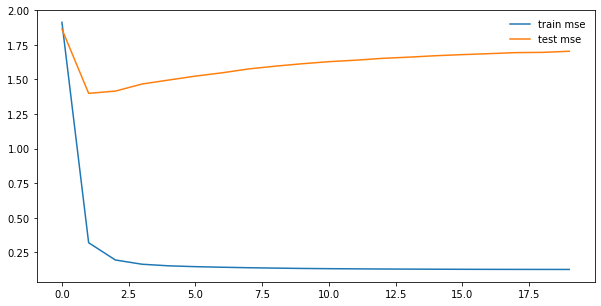

In [ ]:
%%time
train_r, test_r = train_test_split(ratings2, test_size=0.2)
params = {'dims': dims, 'dim_D': 15, 'lambda_': 1, 'sigma2': 1, 'epoch_num': 20, 'logger': logger}
pmf = PMF(**params).fit(train_r)
train_mse = pmf.compute_hitstorical_errors(train_r)
test_mse = pmf.compute_hitstorical_errors(test_r)
result = pd.concat([train_mse.to_frame('train mse'),
                    test_mse.to_frame('test mse')], axis=1)
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
result.plot(ax=ax)
plt.legend(frameon=False)

# Result

After a few ieration, the model with best hypyerparameters is rapidly converged and well-generalized to mitigate test error.

In large feature dimension case, there is the genelarization gap between training error and testing error.